## Download data

In [ ]:
!gdown 1cGmu0zdmqO9_WvtBNrpj3eky4kDXMZhf
!gdown 1RO4u2Y-Tmuk1VisYQdA9cTg1bPEGr3WL
!gdown 18WGjyzQPv3Py8OKHzZfzEp19GxEETKl_
!gdown 1bt_2ZyE_EqY_N3SJqKP_2vdslfMJQlpP
!gdown 1Pp7k9YiSPpiNjPA5LFJ-bKjkImW1n6ZY
!gdown 1t1RCUIdUTSCFWBc-fmVajo14HB7wdMdV
!gdown 1RO4u2Y-Tmuk1VisYQdA9cTg1bPEGr3WL

In [ ]:
!mkdir data
!mkdir data/unpacked

Unzip the data

In [ ]:
!unzip VIL_merc_2020_01-03.zip -d data/unpacked/20_01_03/
!unzip VIL_merc_2020_04-06.zip -d data/unpacked/20_04_06/
!unzip VIL_merc_2020_07-12.zip -d data/unpacked/20_07_12/
!unzip VIL_merc_2021_07-12.zip -d data/unpacked/21_07_12/
!unzip VIL_merc_2021_01-06.zip -d data/unpacked/21_01_06/

!unzip statuses.zip -d data/unpacked/

In [ ]:
#!cp -r data/unpacked/ drive/MyDrive/aigames_data

Mount drive

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

## Extract data

In [ ]:
!mkdir drive/MyDrive/aigames_data/merged

In [ ]:
!cp drive/MyDrive/aigames_data/unpacked/20_01_03/VIL_merc/* drive/MyDrive/aigames_data/merged

In [ ]:
!cp drive/MyDrive/aigames_data/unpacked/20_04_06/VIL_merc/* drive/MyDrive/aigames_data/merged

In [ ]:
!cp drive/MyDrive/aigames_data/unpacked/20_07_12/VIL_merc/* drive/MyDrive/aigames_data/merged
!cp drive/MyDrive/aigames_data/unpacked/21_01_06/VIL_merc/* drive/MyDrive/aigames_data/merged
!cp drive/MyDrive/aigames_data/unpacked/21_07_12/VIL_merc/* drive/MyDrive/aigames_data/merged

In [ ]:
!ls drive/MyDrive/aigames_data/merged/ | wc

Some algorithms for waypoints (didn't use them after all)

In [ ]:
import math
from typing import List, Tuple

import numpy as np

class WaypointsExtender:
  def __init__(self, k: float = 1.0):
    """
    Args:
      k (int, optional): tells how many steps per matrix pixel
    """
    BOUNDARIES = [(21.9430, -67.5), (55.7765, -135)]
    M_WIDTH = abs(BOUNDARIES[0][1] - BOUNDARIES[1][1])
    M_HEIGHT = abs(BOUNDARIES[0][0] - BOUNDARIES[1][0])
    P_WIDTH = 5120
    P_HEIGHT = 2566
    WIDTH_STEP = M_WIDTH / P_WIDTH
    HEIGHT_STEP = M_HEIGHT / P_HEIGHT
    self.step = (WIDTH_STEP + HEIGHT_STEP) / 2 / k

  def _create_between(self,
                      p1: Tuple[float, float], p2: Tuple[float, float],
                      verbose: bool = False) -> List[Tuple[float, float]]:
    dist = math.sqrt(abs(p2[0] - p1[0])**2 + abs(p2[1] - p1[1])**2)
    if dist < self.step:
      return [p1, p2]
    n = math.ceil(dist / self.step)
    
    if verbose:
      print(f"dist={dist}, n={n}")
    x_space = np.linspace(start = p1[0], stop = p2[0], num = n)
    y_space = np.linspace(start = p1[1], stop = p2[1], num = n)
    
    return [t for t in zip(x_space, y_space)]

  def __call__(self, points: List[Tuple[float, float]], verbose: bool = False) -> List[Tuple[float, float]]:
    new_points = []
    for idx in range(len(points) - 1):
      i, j = idx, idx + 1
      between = self._create_between(points[i], points[j], verbose)
      if i != 0:
        new_points.extend(between[1:])
      else:
        new_points.extend(between)
    return new_points

    

In [ ]:
points = [(1, 5), (3, 12), (6, 19)]
l = WaypointsExtender(0.1)(points, True)
print(f"{l}")

Some other experiments


In [ ]:
import pandas as pd
fields = ['timestamp']

train_df = pd.read_csv(f"drive/MyDrive/aigames_data/train_observations.csv", skipinitialspace=True, usecols=fields)
test_df = pd.read_csv(f"drive/MyDrive/aigames_data/test_observations.csv", skipinitialspace=True, usecols=fields)
print(len(test_df))

In [ ]:
train_times = list(x[0] for x in train_df.values)
test_times = list(x[0] for x in test_df.values)

In [ ]:
print(test_times[:10])

In [ ]:
def remove_sec(l):
  ret = []
  for s in l:
    ret.append(" ".join(s.split(' ')[:1]))
  return ret

In [ ]:
train_times_nosec = remove_sec(train_times)
test_times_nosec = remove_sec(test_times)

In [ ]:
print(test_times_nosec[:10])

In [ ]:
isin, notin = 0, 0
s = set(train_times_nosec)
for x in test_times_nosec:
  if x in s:
    isin += 1
  else:
    notin += 1
print(f"isin={isin}, notin={notin}")

In [ ]:
print(max(test_times))

In [ ]:
fields = ["route_id", "timestamp", "status"]
merged_df = pd.read_csv(f"drive/MyDrive/aigames_data/train_obs_avail_merged.csv", skipinitialspace=True, usecols=fields)

In [ ]:
routes = merged_df.route_id.unique()
print(routes)

In [ ]:
from collections import defaultdict
import matplotlib.pyplot as plt

def convert_to_year(s):
  s = s.split()[1]
  s = s.split(":")[0]
  return int(s)

route_cnt = {}
for route in routes:
  df = merged_df[merged_df.route_id == route]
  route_cnt[route] = len(df.index)

plt.bar(list(route_cnt.keys()), route_cnt.values(), color='g')
plt.show()
# print(route_cnt)
print(max(route_cnt, key=route_cnt.get))

In [ ]:

routes_sorted = sorted(route_cnt, key=route_cnt.get, reverse=True)
print([(name, route_cnt[name]) for name in routes_sorted])

In [ ]:
# plot histogram per hour for some of the routes
for route in routes_sorted[:10]:#["JEFPO1 JEFPO"]:#routes[:5]:
  open_ = defaultdict(int)
  all_ = defaultdict(int)
  df = merged_df[merged_df.route_id == route]
  df.timestamp = df.timestamp.apply(convert_to_year)
  df = df.drop('route_id', axis=1)
  
  for v in df.values:
    hour = v[0]
    opened = v[1]
    all_[hour] += 1
    if opened:
      open_[hour] += 1
  
  hours = list(range(0, 24))
  # aggreg = {h: [open_[h], all_[h]] for h in hours}
  # print(aggreg.values())
  for h in hours:
    open_[h] = open_[h]
    all_[h] = all_[h]
  # ratio = {h: open_[h] / all_[h] for h in open_.keys()}
  plt.title(route)
  plt.bar(list(all_.keys()), all_.values(), color='r')
  plt.bar(list(open_.keys()), open_.values(), color='g')
  plt.show()

### Add weather info to the data


In [ ]:
dfw_df = pd.read_csv(f"drive/MyDrive/aigames_data/DFW_features.csv", skipinitialspace=True)
sea_df = pd.read_csv(f"drive/MyDrive/aigames_data/SEA_features.csv", skipinitialspace=True)
iah_df = pd.read_csv(f"drive/MyDrive/aigames_data/IAH_features.csv", skipinitialspace=True)

In [ ]:
# dfw_df['Date'] = pd.to_datetime(dfw_df['valid'], infer_datetime_format=True)
# dfw_df['Date'].values[0]

from datetime import datetime

def parse_date(s):
  return datetime.strptime(s, "%Y-%m-%d %H:%M")

for df in [dfw_df, sea_df, iah_df]:

  df['Date'] = df['valid'].apply(parse_date)
  df['Year'] = df['Date'].apply(lambda x: x.year)
  df['Month'] = df['Date'].apply(lambda x: x.month)
  df['Day'] = df['Date'].apply(lambda x: x.day)
  df['Hour'] = df['Date'].apply(lambda x: x.hour)
  df['Minute'] = df['Date'].apply(lambda x: x.minute)
  df['Second'] = df['Date'].apply(lambda x: x.second)


In [ ]:
sea_df.head()

In [ ]:
train_df_time = pd.read_csv(f"drive/MyDrive/aigames_data/train_obs_avail_without_duplicates.csv", skipinitialspace=True)
routes_df = pd.read_csv(f"drive/MyDrive/aigames_data/route_definitions_without_duplicates.csv", skipinitialspace=True)#, usecols=["route_id", "airport"])
print(routes_df.columns)
routes_df = routes_df.drop('Unnamed: 0', axis=1)
routes_df = routes_df.drop('route_type', axis=1)
routes_df = routes_df.drop('waypoints', axis=1)

In [ ]:
print(routes_df.columns)
train_airport = train_df_time.merge(routes_df, how='left', on="route_id")
train_airport = train_airport.drop_duplicates()

In [ ]:
print(len(train_df_time))
print(len(train_airport))

In [ ]:
train_airport.head()

In [50]:
train_airport = train_airport[:100]

In [ ]:
train_airport.head()

In [ ]:
# match weather info to the timestamp
keys = ["tmpf", "dwpf", "relh", "drct", "sknt", "p01i", "alti", "mslp", "vsby", "skyc1", "skyl1", "feel"]
def add_weather_fts(row):
  # print(row)
  if row['airport'] == "KIAH":
    frame = iah_df
  elif row['airport'] == "KDFW":
    frame = dfw_df
  elif row['airport'] == "KSEA":
    frame = sea_df
  else:
    raise "wrong airport"

  dt = datetime.strptime(row['timestamp'], "%Y-%m-%d %H:%M:%S%z")
  frame_ = frame[frame.Year == dt.year]
  frame_ = frame_[frame_.Month == dt.month]
  frame_ = frame_[frame_.Day == dt.day]
  frame_ = frame_[frame_.Hour == dt.hour]
  frame_ = frame_.head(1)
  try:
    s = pd.Series([frame_[x].values[0] for x in keys])
  except Exception as e:
    s = pd.Series([-1 for _ in keys])
  return s

train_airport[keys] = train_airport.apply(lambda row: add_weather_fts(row), axis=1)

In [ ]:
train_airport.head()

In [ ]:
train_airport.to_csv("drive/MyDrive/aigames_data/with_features.csv")

In [ ]:
train_airport_empty = train_airport
keys_to_keep = keys
keys_to_keep.append('observation_id')
# print(train_airport_empty.columns)
todrop = [key for key in train_airport_empty.columns if key not in keys_to_keep]
train_airport_empty = train_airport_empty.drop(todrop, axis=1)
train_airport_empty.head()

In [ ]:
train_df_x = pd.read_csv(f"drive/MyDrive/aigames_data/train_obs_avail_without_duplicates.csv", skipinitialspace=True)
train_new = train_df_x.merge(train_airport_empty)
train_new.head()

In [ ]:
train_new.to_csv("drive/MyDrive/aigames_data/train_observations_with_wind.csv")

In [ ]:
test_df_time = pd.read_csv(f"drive/MyDrive/aigames_data/test_observations.csv", skipinitialspace=True)
routes_df = pd.read_csv(f"drive/MyDrive/aigames_data/route_definitions_without_duplicates.csv", skipinitialspace=True)#, usecols=["route_id", "airport"])
print(routes_df.columns)
routes_df = routes_df.drop('Unnamed: 0', axis=1)
routes_df = routes_df.drop('route_type', axis=1)
routes_df = routes_df.drop('waypoints', axis=1)

In [ ]:
print(routes_df.columns)
test_airports = test_df_time.merge(routes_df, how='left', on="route_id")
test_airports = test_airports.drop_duplicates()
print(len(test_df_time))
print(len(test_airports))

In [ ]:
test_airports.head()

In [ ]:
keys = ["tmpf", "dwpf", "relh", "drct", "sknt", "p01i", "alti", "mslp", "vsby", "skyc1", "skyl1", "feel"]
def add_weather_fts(row):
  # print(row)
  if row['airport'] == "KIAH":
    frame = iah_df
  elif row['airport'] == "KDFW":
    frame = dfw_df
  elif row['airport'] == "KSEA":
    frame = sea_df
  else:
    raise "wrong airport"

  # print(frame.head())

  dt = datetime.strptime(row['timestamp'], "%Y-%m-%d %H:%M:%S%z")
  frame_ = frame[frame.Year == dt.year]
  frame_ = frame_[frame_.Month == dt.month]
  frame_ = frame_[frame_.Day == dt.day]
  frame_ = frame_[frame_.Hour == dt.hour]
  frame_ = frame_.head(1)
  try:
    s = pd.Series([frame_[x].values[0] for x in keys])
  except Exception as e:
    s = pd.Series([-1 for _ in keys])
  return s

test_airports[keys] = test_airports.apply(lambda row: add_weather_fts(row), axis=1)

In [ ]:
test_airports = test_airports.drop("airport", axis=1)
test_airports.to_csv("drive/MyDrive/aigames_data/test_observations_with_wind.csv")

In [ ]:
train_wind = pd.read_csv("drive/MyDrive/aigames_data/train_observations_with_wind.csv")
test_wind = pd.read_csv("drive/MyDrive/aigames_data/test_observations_with_wind.csv")

In [ ]:
train_wind = train_wind.replace('T', 0.0)
train_wind = train_wind.replace('M', 0.0)

test_wind = test_wind.replace('T', 0.0)
test_wind = test_wind.replace('M', 0.0)

In [ ]:
train_wind = train_wind[train_wind.tmpf != -1]

In [ ]:
print(len(train_wind), len(test_wind))

In [ ]:
train_wind.to_csv("drive/MyDrive/aigames_data/train_wind_clean.csv")
test_wind.to_csv("drive/MyDrive/aigames_data/test_wind_clean.csv")

Experiments with observation_id

In [2]:
import math
from typing import List, Tuple

import numpy as np
import pandas as pd

In [ ]:
train_wind = pd.read_csv("drive/MyDrive/aigames_data/train_wind_clean.csv")
test_wind = pd.read_csv("drive/MyDrive/aigames_data/test_wind_clean.csv")

In [ ]:
def drop_unnameds(df):
  unnameds = [x for x in df.columns if "Unnamed" in x]
  df = df.drop(unnameds, axis=1)
  return df
train_wind = drop_unnameds(train_wind)
test_wind = drop_unnameds(test_wind)

In [ ]:
routes_df = pd.read_csv("drive/MyDrive/aigames_data/route_definitions_with_directions.csv")
routes_df = drop_unnameds(routes_df)

In [ ]:
routes_df.head()

In [ ]:
tmp1 = test_wind[test_wind.route_id == "DAS"]
tmp2 = test_wind[test_wind.route_id == "TTT"]
print(len(tmp1), len(tmp2))

In [ ]:
from collections import defaultdict
x = defaultdict(int)
for index, row in routes_df.iterrows():
  name = row['route_id']
  x[name] += 1

cnt = 0
for k, v in x.items():
  if v > 1:
    print(k)
print(cnt)

In [ ]:
routes_df = routes_df.drop(["waypoints"], axis=1)
routes_df.head()

In [ ]:
tmp = routes_df.drop(routes_df[(routes_df['route_id'] == "TTT") & (routes_df['route_type'] == "ARRIVAL")].index)
tmp = tmp.drop(routes_df[(routes_df['route_id'] == "DAS") & (routes_df['route_type'] == "ARRIVAL")].index)
print(len(routes_df), len(tmp))
tmp.head()

In [ ]:
# train_wind = train_wind[train_wind.route_id != "DAS"]
# train_wind = train_wind[train_wind.route_id != "TTT"]

In [ ]:
train_joined = train_wind.merge(routes_df)
train_joined.head()
test_joined = test_wind.merge(routes_df)
test_joined.head()

In [ ]:
def calc_angle_diff(row):
  a = row['direction']
  b = row['drct']
  d = a - b
  d = (d + 180) % 360 - 180
  return abs(d) / 180

train_joined["angle_diff"] = train_joined.apply(lambda row: calc_angle_diff(row), axis=1)
test_joined["angle_diff"] = test_joined.apply(lambda row: calc_angle_diff(row), axis=1)

In [ ]:
train_joined.head()

In [ ]:
test_joined.isnull().sum()

In [ ]:
print(len(test_joined))
print(len(test_joined.drop_duplicates('observation_id')))
test_joined = test_joined.drop_duplicates('observation_id')

In [ ]:
# train_joined.to_csv("drive/MyDrive/aigames_data/train_wind_clean_v4.csv", index=False)
test_joined.to_csv("drive/MyDrive/aigames_data/test_wind_clean_v4.csv", index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [37]:

train_df = pd.read_csv(f"drive/MyDrive/aigames_data/train_availability.csv", skipinitialspace=True)

In [ ]:
train_df.head()

In [44]:
id_ = train_df['observation_id'].tolist()
status_ = train_df['status'].tolist()
status_ = [1 if x == "CLSD" else 2 for x in status_]

In [ ]:
id_[:10]

In [ ]:
status_[:10]

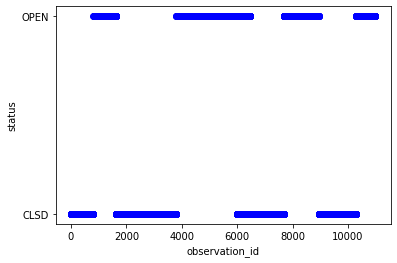

In [45]:
# plot status per observation id
import matplotlib.pyplot as plt
status_ = ["CLSD" if x == 1.0 else "OPEN" for x in status_]
plt.plot(id_[:10000], status_[:10000], 'bo')

plt.xlabel("observation_id")
plt.ylabel("status")
plt.show()

In [35]:
# a cherry on top
train_df = pd.read_csv(f"drive/MyDrive/aigames_data/train_availability.csv",
                       skipinitialspace=True)
test_df = pd.read_csv(f"drive/MyDrive/aigames_data/test_observations.csv",
                      skipinitialspace=True,
                      usecols=['observation_id'])

id = train_df['observation_id'].tolist()
status = [1 if x == "CLSD" else 2 for x in train_df['status'].tolist()]

from collections import defaultdict
d = defaultdict(int)

for idx, obs_id in enumerate(id):
  d[obs_id] = status[idx]

for i in range(1, max(id)):
  if d[i] == 0:
    d[i] = d[i - 1]
  
def add_stat(row):
  obs_id = int(row['observation_id'])
  return "CLSD" if d[obs_id] == 1 else "OPEN"

test_df['status'] = test_df.apply(add_stat, axis=1)
test_df.to_csv('result.csv', index=False)

In [24]:
test_df = pd.read_csv(f"drive/MyDrive/aigames_data/test_observations.csv", skipinitialspace=True)
id_ = test_df['observation_id'].tolist()

In [ ]:
print(cnt)

In [26]:
def add_stat(row):
  i = row['observation_id']
  return "CLSD" if d[int(i)] == 1 else "OPEN"

test_df['status'] = test_df.apply(add_stat, axis=1)

In [ ]:
test_df.head()

In [ ]:
test_df.drop(['route_id', 'timestamp'], axis=1, inplace=True)
test_df.head()

In [29]:
test_df.to_csv('res_dict2.csv', index=False)